## Introduction
Bank fraud is a major issue that can cause serious financial losses for individuals, businesses, and financial institutions. It is a serious crime that can occur in many different forms, ranging from simple check fraud to complex schemes such as identity theft and money laundering. Some of the most common types of bank fraud include counterfeiting, check fraud, identity theft, loan scams, credit card fraud and phishing.

Examples of these frauds can range from small-scale operations to large, multi-million-dollar operation

In this project, I'm using machine learning to detect fraud by testing three algorithms—PCA, K-Nearest Neighbours (KNN), and Support Vector Machine (SVM). PCA helps reduce complexity by identifying key patterns in the data, KNN detects fraud by comparing transactions to similar ones, and SVM works to separate fraudulent and non-fraudulent cases effectively. The goal is to compare their performance and find the most reliable model for spotting fraud.r
Stepep: This feature represents the day from the start of simulation. It has 180 steps so simulation ran for virtually 6 months.
Customer: This feature represents the customer id
zipCodeOrigin: The zip code of origin/source.
Merchant: The merchant's id
zipMerchant: The merchant's zip code
Age: Categorized age
0: <= 18,
1: 19-25,
2: 26-35,
3: 36-45,
4: 46:55,
5: 56:65,
6: > 65
U: Unknown
Gender: Gender for customer
E : Enterprise,
F: Female,
M: Male,
U: Unknown
Category: Category of the purchase. I won't write all categories here, we'll see them later in the analysis.
Amount: Amount of the purchase
Fraud: Target variable which shows if the transaction fraudulent(1) or benign

This synthetically generated dataset consists of payments from various customers made in different time periods and with different amounts0)
Dasetta source: www.kaggle.com/ntnu-testimon/banksim1

In [459]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [460]:
data = pd.read_csv(r'C:\Users\hp\Documents\Datasets\New folder (3)\bs140513_032310\bs140513_032310.csv')

# Exploratory data analysis

In [462]:
data.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [463]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [464]:
data.duplicated().sum()

0

In [465]:
data.sort_values(by='age', ascending=True, inplace=True)

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

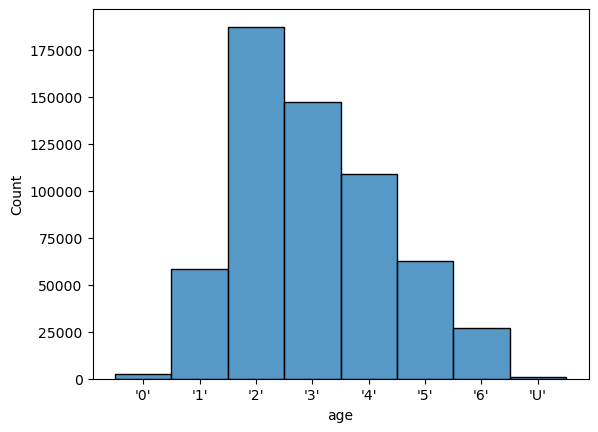

In [466]:
sns.histplot(data['age'])

In [467]:
data.zipcodeOri.nunique()

1

In [468]:
data.zipMerchant.nunique()

1

In [469]:
data.amount.describe()

count    594643.000000
mean         37.890135
std         111.402831
min           0.000000
25%          13.740000
50%          26.900000
75%          42.540000
max        8329.960000
Name: amount, dtype: float64

Fraud-benign distribution: fraud
0    0.987892
1    0.012108
Name: proportion, dtype: float64


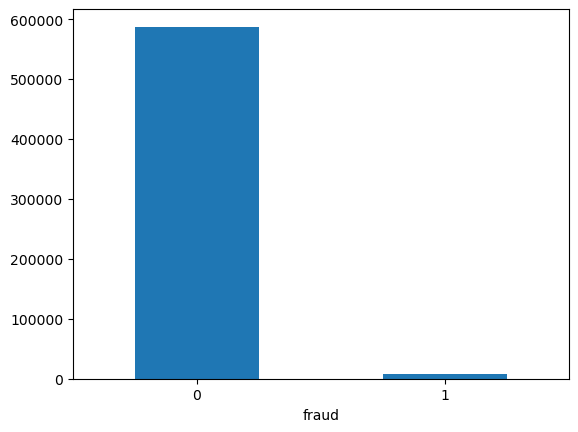

In [470]:
print('Fraud-benign distribution:', data.fraud.value_counts(normalize=True))
data.fraud.value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

98.79% of occurences of the simulations are benign. This represents a sever data imbalance of the target variable.

<Axes: ylabel='count'>

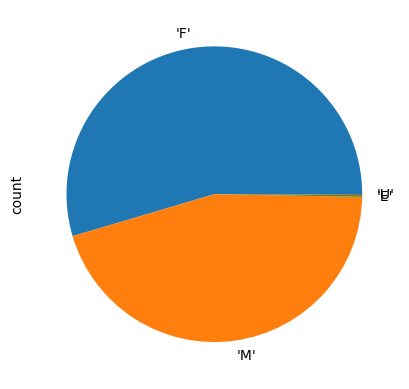

In [472]:
data.gender.value_counts().plot(kind='pie')

In [473]:
print('number of unique categories:', data.category.nunique())
print('which are:',data.category.unique())

number of unique categories: 15
which are: ["'es_transportation'" "'es_barsandrestaurants'" "'es_wellnessandbeauty'"
 "'es_food'" "'es_health'" "'es_hyper'" "'es_home'" "'es_sportsandtoys'"
 "'es_fashion'" "'es_otherservices'" "'es_contents'" "'es_leisure'"
 "'es_tech'" "'es_hotelservices'" "'es_travel'"]


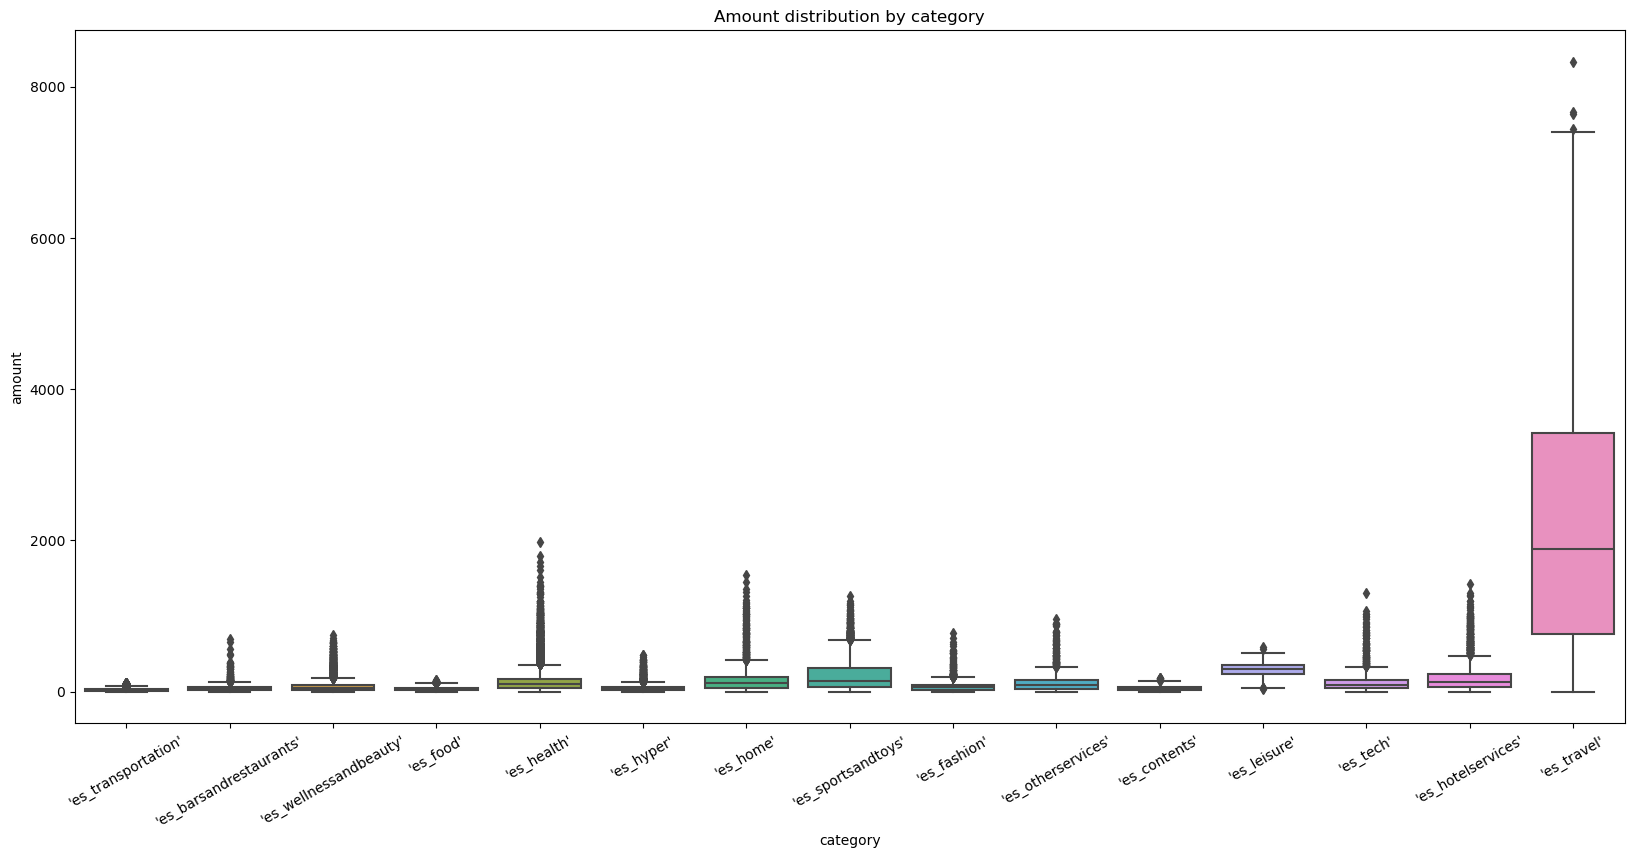

In [474]:
plt.figure(figsize=(20,9))
sns.boxplot(x=data.category, y=data.amount)
plt.title("Amount distribution by category")
plt.xticks(rotation=30)
plt.show()

Travel spending stands out as the highest in the dataset, far exceeding all other categories. It not only has a higher median but also shows a wide range of spending, with some transactions reaching exceptionally high amounts. Meanwhile, categories like technology, health, and sports-related purchases display more variation, suggesting that while most transactions are moderate, occasional high-value purchases drive up the spread. On the other hand, everyday essentials like food and transportation see the lowest spending, likely because these expenses are smaller but occur more frequently.

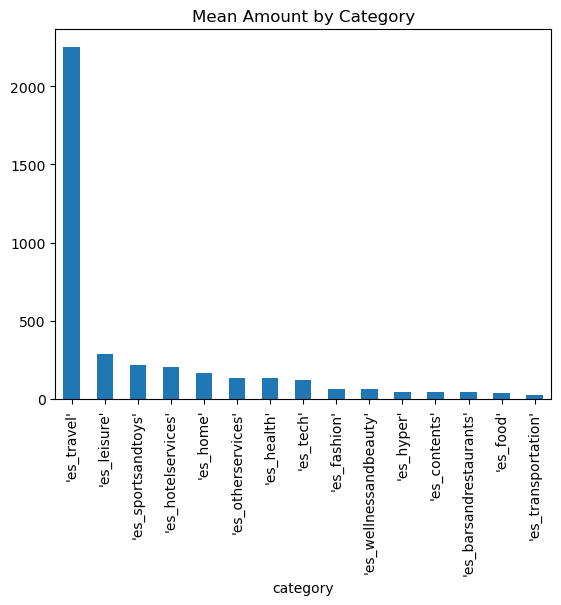

In [476]:
data.groupby('category')['amount'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Mean Amount by Category')
plt.show()

The chart above shows the mean transcation amount of every category in the dataset, with travel coming out on top. Leisure, Sports and Toys, Hotel Services and Home follow up to make the top five categories with the highest mean transaction amount .

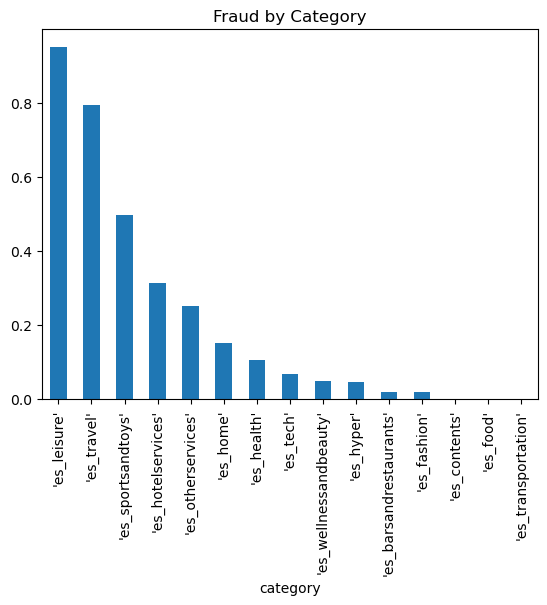

In [478]:
data.groupby('category')['fraud'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Fraud by Category')
plt.show()

This chart shows the categories where the most frequent fraudulent transactions occur. Leisure, which is second in terms of mean transaction amount has ~95% of its transactions as fraudulent. Its is followed by travel with 79%, Sports and Toys with 49%, Hotel Services with 31%, and Other Services with 25%. These five categories with the highest fraudulent activities make up the top six categories with the hihest mean amount. This trend sugests that frausters frequently target categories where the transaction amounts are the highest.

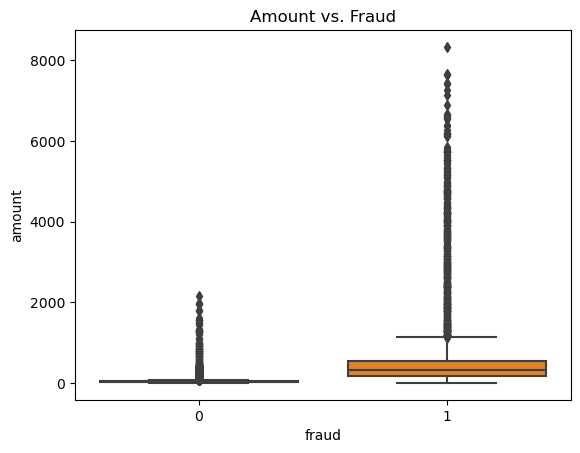

In [480]:
sns.boxplot(x='fraud', y='amount', data=data)
plt.title('Amount vs. Fraud')
plt.show()

The boxplot shows that fraudulent transactions tend to have higher amounts than benign ones, confirming the suspicion that fraudsters target transactions and categories with the highest amount

age
'0'    0.019576
'4'    0.012933
'2'    0.012514
'3'    0.011928
'1'    0.011853
'5'    0.010951
'6'    0.009748
'U'    0.005942
Name: fraud, dtype: float64


<Axes: xlabel='age'>

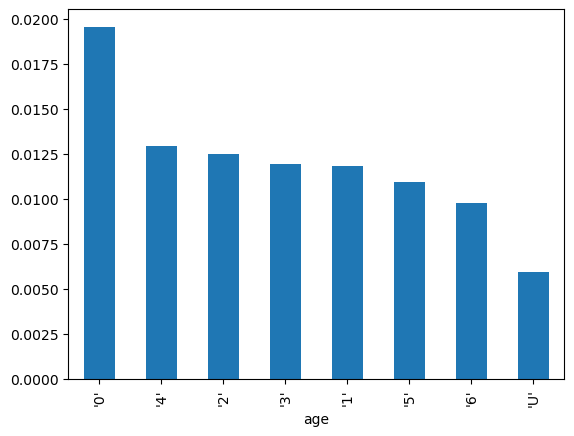

In [482]:
print(data.groupby('age')['fraud'].mean().sort_values(ascending=False))
data.groupby('age')['fraud'].mean().sort_values(ascending=False).plot(kind='bar')

This table shows fraudulent transaction occurs the most amoung younger customers with 0(under 18) being the top age category with most fraudlent activity.

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='amount', ylabel='Count'>

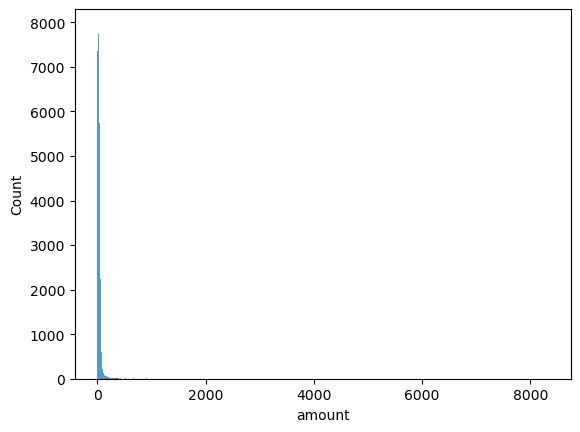

In [484]:
sns.histplot(data.amount)

The histogram shows a right-skewed distribution, with most "amount" values near zero and a long tail.  log transformation will be employed for better modelling.

number of merchants in the simulation: 50
merchants with the highest fraud rates: merchant
'M1294758098'    0.963351
'M3697346'       0.941558
'M1873032707'    0.864000
'M732195782'     0.851974
'M980657600'     0.832109
'M1353266412'    0.820513
'M857378720'     0.754098
'M2080407379'    0.750000
'M2011752106'    0.680328
'M17379832'      0.631206
'M2122776122'    0.586510
'M480139044'     0.465792
'M1741626453'    0.371212
'M495352832'     0.347826
'M923029380'     0.315789
Name: fraud, dtype: float64


<Axes: xlabel='merchant'>

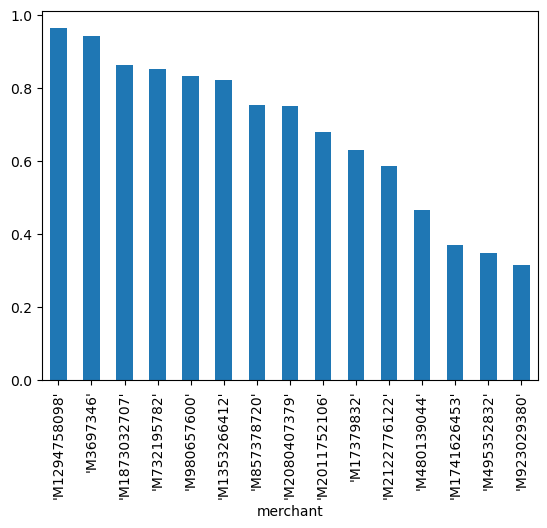

In [486]:
print('number of merchants in the simulation:',data.merchant.nunique())
print('merchants with the highest fraud rates:', data.groupby('merchant')['fraud'].mean().sort_values(ascending=False).head(15))
data.groupby('merchant')['fraud'].mean().sort_values(ascending=False).head(15).plot(kind='bar')

The boxplot shows that fraudulent transactions (class 1) tend to have higher amounts than non-fraudulent ones (class 0). This confi

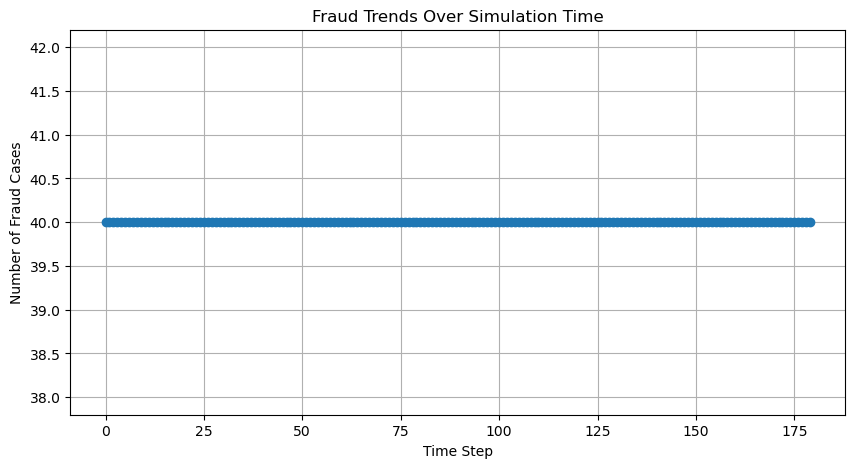

In [488]:
fraud_trend = data.groupby('step')['fraud'].sum()

plt.figure(figsize=(10, 5))
plt.plot(fraud_trend, marker='o', linestyle='-')
plt.xlabel('Time Step')
plt.ylabel('Number of Fraud Cases')
plt.title('Fraud Trends Over Simulation Time')
plt.grid(True)
plt.show()

It seems that the number of fraud cases remained constant across all time steps of the simulation, indicating no variation over time.

# Preprocessing

In [491]:
# Dropping the zipcodes
data.drop(columns=['customer','step','zipcodeOri','zipMerchant'],axis=1, inplace=True)

The zip code colums both have a single zip code in both of them while the step is constant throughout, hence their dropping.

### Encoding categorical data

In [494]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat = data.select_dtypes('object')
for col in cat:
    data[col] = le.fit_transform(data[col])

In [495]:
data.head()

,age,gender,merchant,category,amount,fraud
29085,0,1,30,12,20.80,0
485422,0,1,30,12,40.10,0
242800,0,1,30,12,23.07,0
545158,0,1,30,12,0.37,0
408003,0,1,18,12,13.66,0


### Declaring targeta nd predictor variables

In [497]:
from sklearn.model_selection import train_test_split
X = data.drop('fraud', axis = 1)
y = data.fraud

### Employing SMOTE (Synthetic Minority Oversampling Technique) to address imbalance in target variable

In [499]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=26)
X_res, y_res = sm.fit_resample(X, y)
y_res = pd.DataFrame(y_res)

### Splitting dataset into test and training 

In [501]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, stratify=y_res, random_state=26)

### Scaling the features

In [503]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Applying PCA (Principal Component Analysis) to reduce dimensionality and improve model performance

In [505]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(sum(pca.explained_variance_ratio_))

1.0


In [506]:
print(pca.n_components_)

5


erms, PCA didn’t reduce dimensions because each feature is actually u ion.  

Since all features are impornt, PCA **might not beecessary** for this ataset.  


# Model Building

## K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_pca,y_train)
y_pred = knn.predict(X_test_pca)

In [605]:
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
acc = accuracy_score(y_test, y_pred) * 100
print(f'Model Accuracy is {acc:.2f}%')

Model Accuracy is 99.16%


In [572]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    146861
           1       0.99      1.00      0.99    146861

    accuracy                           0.99    293722
   macro avg       0.99      0.99      0.99    293722
weighted avg       0.99      0.99      0.99    293722



In [600]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test, y_pred) * 100
print(f'{roc:.2f}%')

99.16%


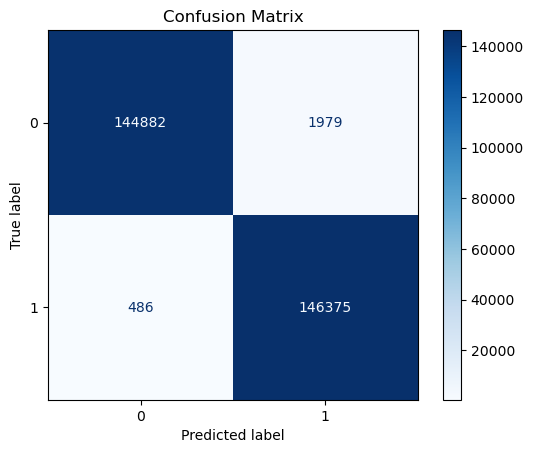

In [615]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=knn.classes_)
disp.plot(cmap="Blues")  
plt.title("Confusion Matrix")
plt.show()

The model achieved 99.16% accuracy, showing that it performs exceptionally well in detecting fraudulent transactions. With 99% precision and recall for both fraud and non-fraud cases, it consistently makes the right predictions with minimal errors.  

The results show 1,979 flagged genuine transactions and 486 undetected fraud cases, but overall, the model is highly reliable for fraud detection. Its strong performance ensures accurate classification of transactions, making it a solid choice for identifying fraudulent activity.